# Librerias

In [1]:
import pandas as pd
import numpy as np
import utils as ut
import matplotlib.pyplot as plt
import lightgbm as lgbm
import sklearn as sk

# Cargar datos

In [2]:
# data = pd.read_csv("data/ARIA_cleaned/Sch.csv", index_col="ScheduledActivitySer")
data = pd.read_csv("data/ARIA_cleaned/Sch76_2.csv", index_col="ScheduledActivitySer")

D:\miniconda3\envs\tfm2\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (25,31,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data3, c_elim, f_elim = ut.quitar_nans(data, 0.5, 1, False)

Se eliminaron 23 columnas y 0 registros


In [4]:
elim = ["Duration", "DefaultDuration"]
data2 = data.drop(columns = elim)

# c_categ = ['HistologyCode', 'CityOrTownship', 'EquipmentSer', 'Technique', 'PrimaryPTVSer_isNaN', 'ActivityCategoryCode', 'CalcModelOptions', 'NotificationPriorTimeFlag_x', 'NoEditFlag_x', 'SkinFlashMargin', 'MultiFieldOptFlag', 'Country', 'DiagnosisCode_sec', 'ResourceGroupSer', 'NoFractions_isNaN', 'SummaryStage', 'ObjectStatus_sec', 'PrescribedPercentage', 'DiagnosisCode', 'FractionPatternDigitsPerDay', 'FractionPattern', 'Site', 'MStage', 'Sex', 'StartDelay', 'ScheduledActivityCode', 'NotificationPriorTime_y', 'Intent', 'ObjectStatus_y_4', 'TreatmentIntentType', 'CalcModelOptionsLen', 'Status_x', 'PhaseType', 'Notes', 'Status_y', 'DicomSeqNumber', 'SimulationNeeded', 'TumorSize_isNaN', 'PrescribedDose_isNaN', 'DateOfBirth_isNaN', 'TStage', 'Duration', 'NotificationPriorTimeFlag_y', 'PlanNormMethod', 'NumberOfFractions', 'PlanNormFactor_isNaN', 'Description', 'TreatmentOrientation', 'HistologyCode_sec', 'Priority', 'PatientStatus', 'AssignableFlag', 'ActivityCode', 'NotificationPriorTime_x', 'DefaultDuration', 'NStage', 'ClinicalStatus', 'InterfaceStamp']
c_categ = ['SchedulableFlag', 'NotificationPriorTimeFlag_y', 'TumorSize_isNaN', 'NotificationPriorTime_y', 'NStage', 'DateOfBirth_isNaN', 'Priority', 'PrescribedDose_isNaN', 'NotificationPriorTime_x', 'ClinicalStatus', 'TreatmentOrientation', 'Status_x', 'AnchorActivityFlag', 'SkinFlashMargin', 'ObjectStatus_y_4', 'TreatmentOrder', 'CityOrTownship', 'Technique', 'Intent', 'TreatmentIntentType', 'AssignableFlag', 'ActivityCode', 'CalcModelOptions', 'StartDelay_isNaN', 'ActivityCategoryCode', 'PrimaryPTVSer_isNaN', 'ResourceGroupSer', 'InterfaceStamp', 'ObjectStatus_sec', 'Sex', 'HistologyCode_sec', 'Description', 'Notes', 'EquipmentSer', 'HistologyCode', 'ScheduledActivityCode', 'DiagnosisCode_sec', 'FractionPattern', 'MStage', 'NotificationPriorTimeFlag_x', 'BolusThickness', 'Site', 'Country', 'PlanNormMethod', 'SummaryStage', 'ActualMachineSer', 'PrescribedPercentage', 'NoEditFlag_x', 'Status_y', 'Duration', 'SimulationNeeded', 'DiagnosisCode', 'NoEditFlag_y', 'TStage', 'DefaultDuration', 'PatientStatus', 'DicomSeqNumber', 'NumberOfFractions_isNaN', 'PhaseType', 'MultiFieldOptFlag', 'FractionPatternDigitsPerDay']
c_categ = ['Intent', 'NoOfFractions_isNaN', 'DefaultDuration', 'SkinFlashMargin', 'PrescribedDose_isNaN', 'DateOfBirth_isNaN', 'TreatmentIntentType', 'InterfaceStamp', 'FractionPatternDigitsPerDay', 'ClinicalStatus', 'NoEditFlag_x', 'CityOrTownship', 'FractionPattern', 'Notes', 'Duration', 'SimulationNeeded', 'DiagnosisCode', 'SchedulableFlag', 'HistologyCode_sec', 'PhaseType', 'ResourceGroupSer', 'ScheduledActivityCode', 'TreatmentOrientation', 'NoFractions_isNaN', 'Sex', 'TreatmentOrder', 'DiagnosisCode_sec', 'Site', 'EquipmentSer', 'PrescribedPercentage', 'ObjectStatus_sec', 'TStage', 'NotificationPriorTime_x', 'SummaryStage', 'StartDelay_isNaN', 'Status_x', 'PatientStatus', 'NotificationPriorTimeFlag_x', 'NotificationPriorTimeFlag_y', 'ActualMachineSer', 'AnchorActivityFlag', 'Country', 'DicomSeqNumber', 'ObjectStatus_y_4', 'Description', 'NoEditFlag_y', 'Priority', 'MStage', 'Status_y', 'CalcModelOptions', 'BolusThickness', 'NumberOfFractions_isNaN', 'NotificationPriorTime_y', 'HistologyCode', 'ActivityCategoryCode', 'PlanNormMethod', 'Technique', 'AssignableFlag', 'PlanNormFactor_isNaN', 'PrimaryPTVSer_isNaN', 'ActivityCode', 'NStage', 'TumorSize_isNaN', 'CalcModelOptionsLen_isNaN', 'MultiFieldOptFlag']
c_categ = list(set(c_categ) - set(elim))

# Train/test

In [5]:
le = sk.preprocessing.LabelEncoder()
for i in c_categ:
    data2.loc[:,i] = le.fit_transform( data2[i].astype(str) )

In [6]:
def train_test(data, train_size, target):
    np.random.seed(5)
    i = np.random.choice(range(len(data)), size=round(len(data)*train_size), replace=False)
    j = np.setdiff1d(range(len(data)), i)

    y_tr = data[target].iloc[i]
    y_te = data[target].iloc[j]
    x_tr = data.iloc[i,:].drop(columns = target)
    x_te = data.iloc[j,:].drop(columns = target)

    return (x_tr, y_tr, x_te, y_te, i, j)
    

(x_tr, y_tr, x_te, y_te, i, j) = train_test(data2, 0.7, "ActualDuration")
# (x_tr, y_tr, x_te, y_te, i, j) = train_test(data2, 0.7, "ScheduledDuration")
print(len(x_tr))
print(len(x_te))

66322
28424


In [7]:
train = lgbm.Dataset(x_tr, label = y_tr, categorical_feature = c_categ )
test  = lgbm.Dataset(x_te, label = y_te, categorical_feature = c_categ )

In [8]:
parameters = {
    'objective': 'regression',
    'metric': ['rmse'],
#     'metric': ['poisson'],
    'boosting': 'gbdt',
    'learning_rate': 0.1,
    'verbose': 1,
#     'force_col_wise': 'true',
    
    # params util to prevent overfitting:
#     'feature_fraction': 0.4,
#     'bagging_fraction': 0.4,
#     'bagging_freq': 8,
    'num_leaves': 60,
#     'path_smooth': 10,
#     'lambda_l1': 100,
#     'lambda_l2': 100,
#     'min_data_in_leaf': 10,
#     'max_depth': 20,
    
#     'max_bin': 255,
#     'min_data_in_bin': 3,
}

model = lgbm.train(parameters, train, categorical_feature = c_categ, 
                       valid_sets = [test, ],
                       num_boost_round = 5000,
                       early_stopping_rounds = 200,
                  )
# 4.28

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 66322, number of used features: 72
[LightGBM] [Info] Start training from score 15.143859
[1]	valid_0's rmse: 6.28938
Training until validation scores don't improve for 200 rounds
[2]	valid_0's rmse: 6.06341
[3]	valid_0's rmse: 5.87194

D:\miniconda3\envs\tfm2\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
D:\miniconda3\envs\tfm2\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[4]	valid_0's rmse: 5.70981
[5]	valid_0's rmse: 5.56937
[6]	valid_0's rmse: 5.44922
[7]	valid_0's rmse: 5.34928
[8]	valid_0's rmse: 5.26299
[9]	valid_0's rmse: 5.18959
[10]	valid_0's rmse: 5.12787
[11]	valid_0's rmse: 5.07459
[12]	valid_0's rmse: 5.02814
[13]	valid_0's rmse: 4.988
[14]	valid_0's rmse: 4.9533
[15]	valid_0's rmse: 4.9248
[16]	valid_0's rmse: 4.89821
[17]	valid_0's rmse: 4.87733
[18]	valid_0's rmse: 4.85578
[19]	valid_0's rmse: 4.83527
[20]	valid_0's rmse: 4.81858
[21]	valid_0's rmse: 4.80165
[22]	valid_0's rmse: 4.78667
[23]	valid_0's rmse: 4.77268
[24]	valid_0's rmse: 4.75963
[25]	valid_0's rmse: 4.74843
[26]	valid_0's rmse: 4.73845
[27]	valid_0's rmse: 4.72771
[28]	valid_0's rmse: 4.7206
[29]	valid_0's rmse: 4.71318
[30]	valid_0's rmse: 4.70531
[31]	valid_0's rmse: 4.69891
[32]	valid_0's rmse: 4.69256
[33]	valid_0's rmse: 4.68476
[34]	valid_0's rmse: 4.67806
[35]	valid_0's rmse: 4.67237
[36]	valid_0's rmse: 4.66429
[37]	valid_0's rmse: 4.65636
[38]	valid_0's rmse: 4.6

[286]	valid_0's rmse: 4.35027
[287]	valid_0's rmse: 4.35035
[288]	valid_0's rmse: 4.34978
[289]	valid_0's rmse: 4.34952
[290]	valid_0's rmse: 4.34995
[291]	valid_0's rmse: 4.34998
[292]	valid_0's rmse: 4.34985
[293]	valid_0's rmse: 4.34985
[294]	valid_0's rmse: 4.34944
[295]	valid_0's rmse: 4.34884
[296]	valid_0's rmse: 4.34912
[297]	valid_0's rmse: 4.34886
[298]	valid_0's rmse: 4.34881
[299]	valid_0's rmse: 4.34782
[300]	valid_0's rmse: 4.3471
[301]	valid_0's rmse: 4.34668
[302]	valid_0's rmse: 4.3465
[303]	valid_0's rmse: 4.34575
[304]	valid_0's rmse: 4.3458
[305]	valid_0's rmse: 4.34576
[306]	valid_0's rmse: 4.34562
[307]	valid_0's rmse: 4.34563
[308]	valid_0's rmse: 4.34527
[309]	valid_0's rmse: 4.34501
[310]	valid_0's rmse: 4.3447
[311]	valid_0's rmse: 4.34447
[312]	valid_0's rmse: 4.34423
[313]	valid_0's rmse: 4.3444
[314]	valid_0's rmse: 4.34463
[315]	valid_0's rmse: 4.34443
[316]	valid_0's rmse: 4.34418
[317]	valid_0's rmse: 4.34399
[318]	valid_0's rmse: 4.34385
[319]	valid_0's

[588]	valid_0's rmse: 4.31261
[589]	valid_0's rmse: 4.31259
[590]	valid_0's rmse: 4.31247
[591]	valid_0's rmse: 4.31267
[592]	valid_0's rmse: 4.31259
[593]	valid_0's rmse: 4.31254
[594]	valid_0's rmse: 4.31275
[595]	valid_0's rmse: 4.31253
[596]	valid_0's rmse: 4.31256
[597]	valid_0's rmse: 4.31288
[598]	valid_0's rmse: 4.31271
[599]	valid_0's rmse: 4.31287
[600]	valid_0's rmse: 4.3127
[601]	valid_0's rmse: 4.31199
[602]	valid_0's rmse: 4.31187
[603]	valid_0's rmse: 4.31161
[604]	valid_0's rmse: 4.31166
[605]	valid_0's rmse: 4.31174
[606]	valid_0's rmse: 4.31163
[607]	valid_0's rmse: 4.31152
[608]	valid_0's rmse: 4.31125
[609]	valid_0's rmse: 4.31121
[610]	valid_0's rmse: 4.31116
[611]	valid_0's rmse: 4.31125
[612]	valid_0's rmse: 4.31134
[613]	valid_0's rmse: 4.31117
[614]	valid_0's rmse: 4.31135
[615]	valid_0's rmse: 4.31134
[616]	valid_0's rmse: 4.31144
[617]	valid_0's rmse: 4.31133
[618]	valid_0's rmse: 4.31144
[619]	valid_0's rmse: 4.3115
[620]	valid_0's rmse: 4.31157
[621]	valid_

[871]	valid_0's rmse: 4.3074
[872]	valid_0's rmse: 4.30722
[873]	valid_0's rmse: 4.30719
[874]	valid_0's rmse: 4.3072
[875]	valid_0's rmse: 4.30746
[876]	valid_0's rmse: 4.30746
[877]	valid_0's rmse: 4.30748
[878]	valid_0's rmse: 4.30747
[879]	valid_0's rmse: 4.30749
[880]	valid_0's rmse: 4.30754
[881]	valid_0's rmse: 4.30776
[882]	valid_0's rmse: 4.30785
[883]	valid_0's rmse: 4.3079
[884]	valid_0's rmse: 4.30792
[885]	valid_0's rmse: 4.30794
[886]	valid_0's rmse: 4.30816
[887]	valid_0's rmse: 4.30836
[888]	valid_0's rmse: 4.3083
[889]	valid_0's rmse: 4.30834
[890]	valid_0's rmse: 4.30815
[891]	valid_0's rmse: 4.30807
[892]	valid_0's rmse: 4.30832
[893]	valid_0's rmse: 4.30839
[894]	valid_0's rmse: 4.30839
[895]	valid_0's rmse: 4.30849
[896]	valid_0's rmse: 4.30843
[897]	valid_0's rmse: 4.30848
[898]	valid_0's rmse: 4.3084
[899]	valid_0's rmse: 4.30831
[900]	valid_0's rmse: 4.30841
[901]	valid_0's rmse: 4.30836
[902]	valid_0's rmse: 4.30846
[903]	valid_0's rmse: 4.30863
[904]	valid_0's

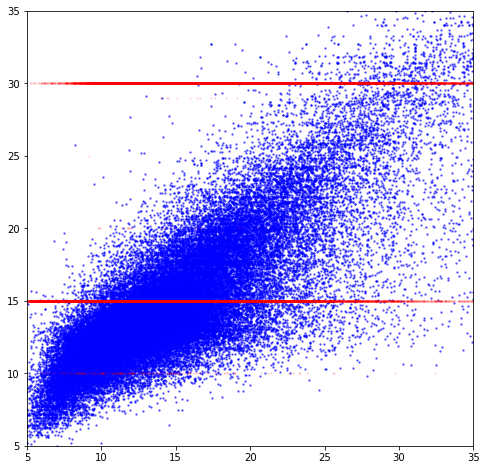

In [9]:
y_pred = model.predict(x_tr)

fig = plt.figure(1, figsize=(8,8))
plt.scatter(y_tr, y_pred, s = 2, alpha = 0.5, color = "blue")
plt.scatter(y_tr, data.ScheduledDuration.iloc[i], s = 2, alpha = 0.1, color = "red")

plt.xlim(5, 35)
plt.ylim(5, 35)
plt.show()

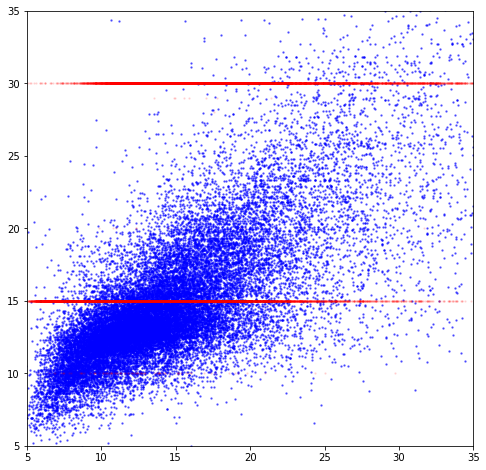

In [10]:
y_pred = model.predict(x_te)

fig = plt.figure(1, figsize=(8,8))
plt.scatter(y_te, y_pred, s=2, alpha = 0.5, color="blue")
plt.scatter(y_te, data.ScheduledDuration.iloc[j], s=2, alpha = 0.1, color="red")

plt.xlim(5, 35)
plt.ylim(5, 35)
plt.show()

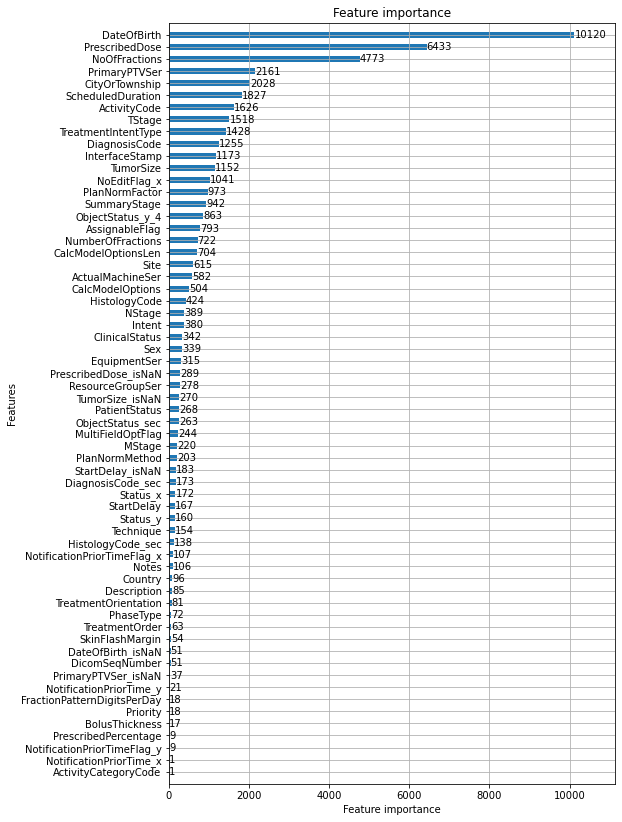

In [11]:
lgbm.plot_importance(model, height=0.5).figure.set_size_inches(8, 14)

<AxesSubplot:>

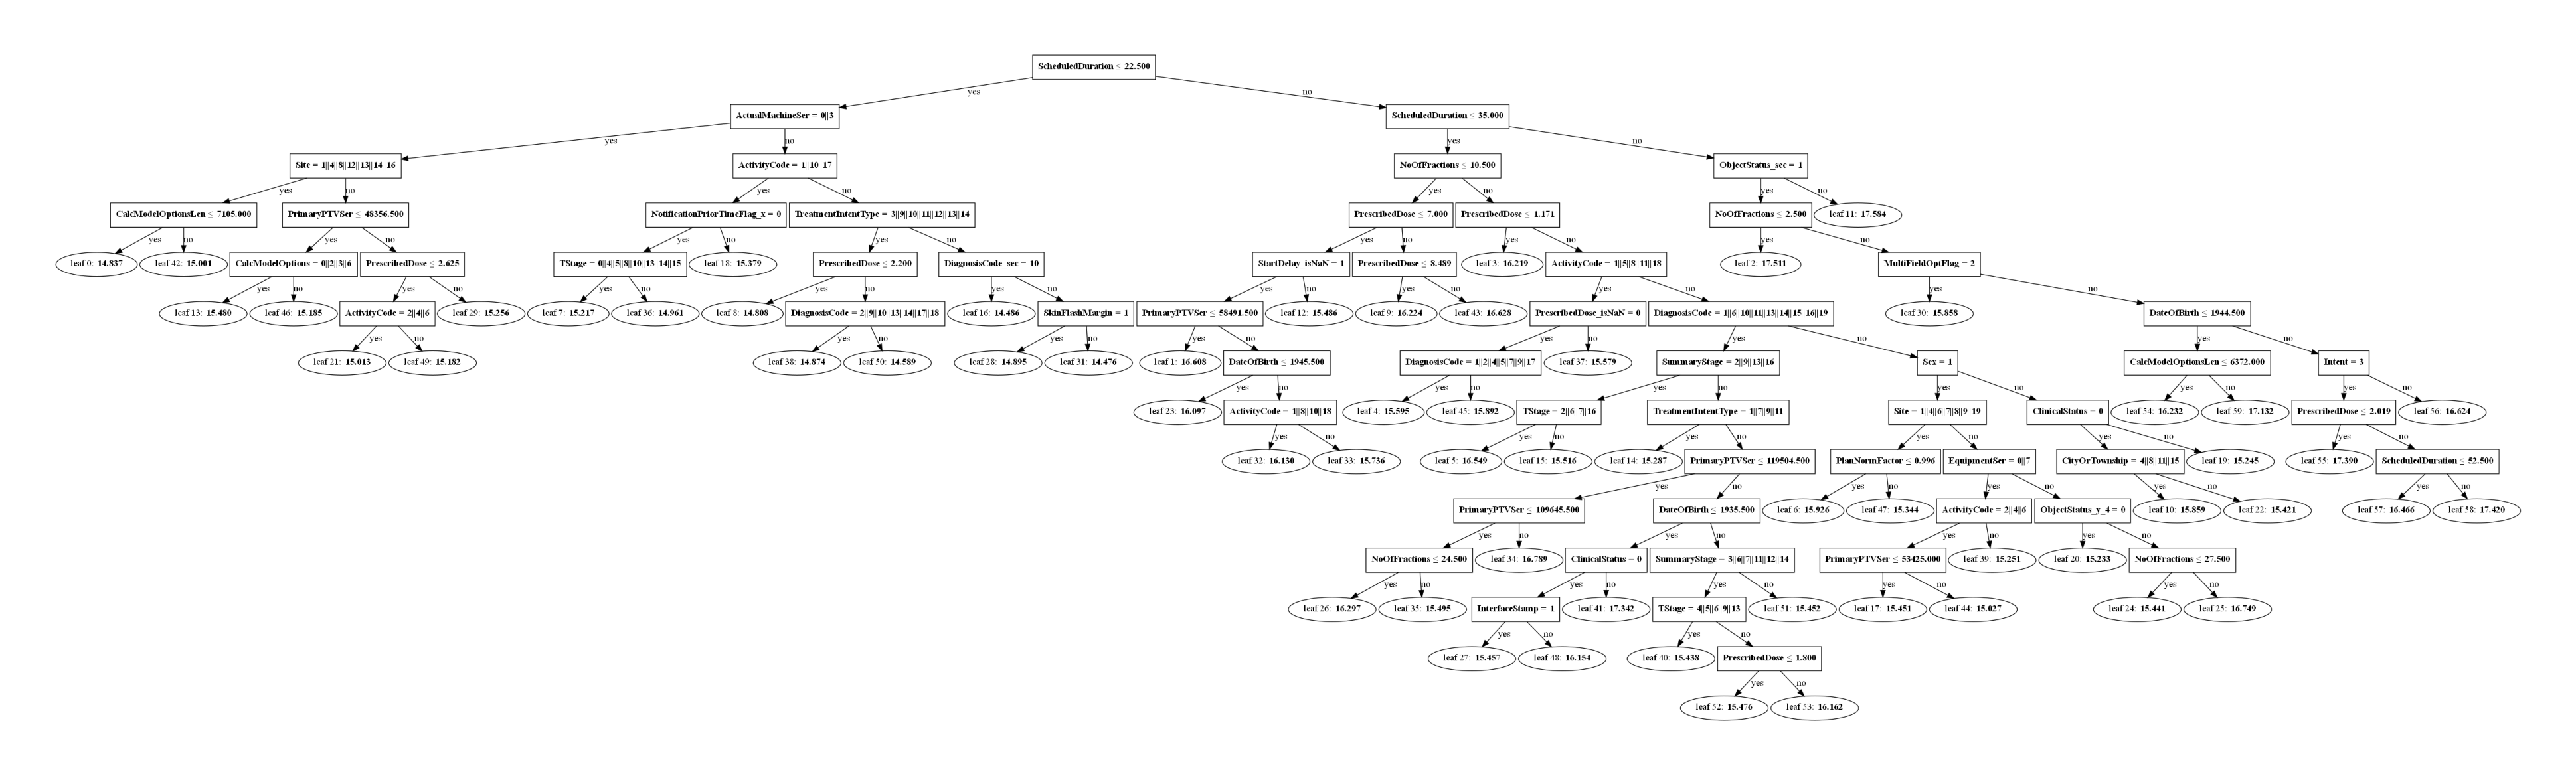

In [12]:
lgbm.plot_tree(model, tree_index = 0, orientation='vertical', dpi=800)

In [13]:
print(np.mean(y_pred))
print(np.mean(y_te))
print(np.mean(data.ScheduledDuration))

15.099316866318802
15.100202293836196
20.243609228885653


# Ex

In [ ]:
# uno = sch2.real[sch2.ActivityCode=="New Start"]
# dos = sch2.real[sch2.ActivityCode=="Fin Tratamiento"]
# tres= sch2.real
# # cua = sch2.real[sch2.ActivityCode=="Fin Tratamiento"]

# plt.hist(uno, bins=100, range=[0,40], density=True, alpha=0.5, color="red")
# plt.hist(dos, bins=100, range=[0,40], density=True, alpha=0.5, color="blue")
# plt.hist(tres,bins=100, range=[0,40], density=True, alpha=0.5, color="green")
# # plt.hist(cua ,bins=100, range=[0,40], density=True, alpha=0.5, color="yellow")
# plt.show()